In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob

Determine the fractional size of the largest connected forest for each of
the Ntests, and find the average of these, Savg

In [7]:
L = [10, 50, 100, 200, 500, 1000]

In [9]:
# open dict L = 50
file_names = glob.glob("percolation*.pickle")
exp_file = open(file_names[0], 'rb')
exp_L10 = pickle.load(exp_file)
exp_file.close()

In [11]:
def find_Savg(exp_dict:dict):
    S_avg = {}
    for key in exp_dict.keys():
        S_avg[key] = np.mean(exp_dict[key])
    return S_avg

In [ ]:
S_avg_10 = find_Savg(exp_L10)


In [ ]:
# On a single figure, for each L, plot the average Savg as a function of p.

In [17]:
def plot_S_avg_function_of_p(S_avg_p:dict, L:int, save = False):
    fig, ax = plt.subplots()
    x_data = list(S_avg_p.keys())
    y_data = list(S_avg_p.values())
    ax.plot(x_data, y_data, 'r.', label = "L = "+str(L))
    ax.legend()
    title_str = "S_avg vs p for L = "+str(L)
    ax.set_xlabel("p")
    ax.set_ylabel("S_avg")
    ax.set_title(title_str)
    if save:
        plt.savefig("S_avg_vs_p_for_N_"+str(L)+".png")
    plt.show()

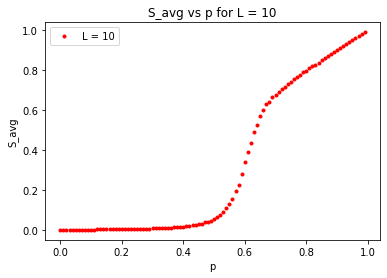

In [18]:
plot_S_avg_function_of_p(S_avg_10, 10, True)

# P5: 
a) Using your model from the previous question and your estimate of pc, plot
the distribution of forest sizes (meaning cluster sizes) for p ≃ pc for the
largest L your code and psychological makeup can withstand. (You can
average the distribution over separate simulations.)
Comment on what kind of distribution you find.
(b) Repeat the above for p = pc/2 and p = pc + (1 − pc)/2, i.e., well below and
well above pc.
Produce plots for both cases, and again, comment on what you find

In [ ]:
L = [10, 20, 50, 100, 200, 500, 1000]
p_c = 0.6
num_experiments = 100
lcc_pc = {k: [] for k in L}
for grid_size in L:
    print("Running 100 experiments for gridsize = ", grid_size)
    for _ in range(num_experiments):
        lcc = maxAreaOfIsland(generate_grid(grid_size, p))
        lcc_pc[grid_size].append(lcc)
    lcc_pc = {k:v for k,v in sorted(lcc_pc.items(), key=lambda t: t[0])}
    exp_file = open('percolation_experiment_pc_size_distribution' + str(grid_size)+'.pickle', 'wb')
    pickle.dump(lcc_pc, exp_file)
    exp_file.close()